In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/config/workspace/notebooks/data/car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
print(f'shape of the dataset: {df.shape}',end='\n')
print('===================================')
print(f'columns of the dataset: {df.columns}',end='\n')
print('===================================')
print(f' null columns : {[i for i in df.columns if df[i].isnull().sum()>1]}')
print('===================================')
print(f'Info for the dataset: {df.info()}')
print('===================================')
print(f'Duplicated Data : {df.duplicated().sum()}')

shape of the dataset: (4340, 8)
columns of the dataset: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')
 null columns : []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
Info for the dataset: None
Duplicated Data : 763


In [4]:
print(f'duplicated values exist: {df.duplicated().sum()}')

duplicated values exist: 763


In [5]:
print(f' describe the dataset: {df.describe()}')

 describe the dataset:               year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [6]:
df.shape

(4340, 8)

In [7]:
df=df.drop_duplicates(keep='first')

In [8]:
df.shape

(3577, 8)

In [9]:
numerical_features=[features for features in df.columns if df[features].dtypes!='object']
#categorical_features=df.columns[df.dtypes=='object']

#df.select_dtypes(exclude="object").columns
categorical_features=[features for features in df.columns if df[features].dtypes=='object']

print(f'We have {len(numerical_features)} numeric features : {numerical_features}')

print("=======================================")

print(f'We have {len(categorical_features)} Categorical features : {categorical_features}')

We have 3 numeric features : ['year', 'selling_price', 'km_driven']
We have 5 Categorical features : ['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


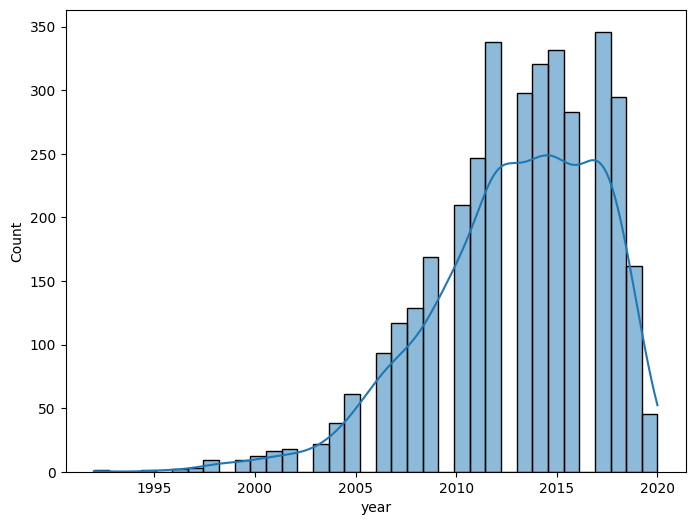

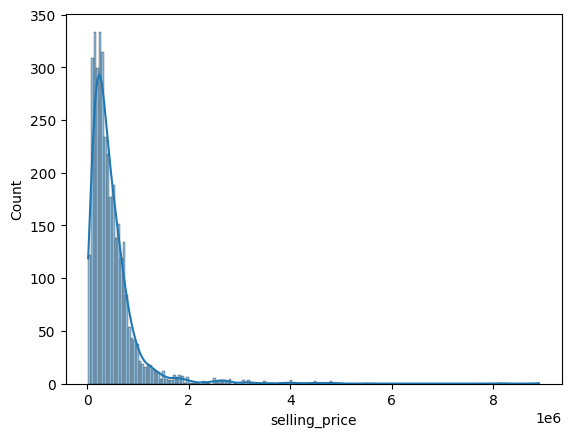

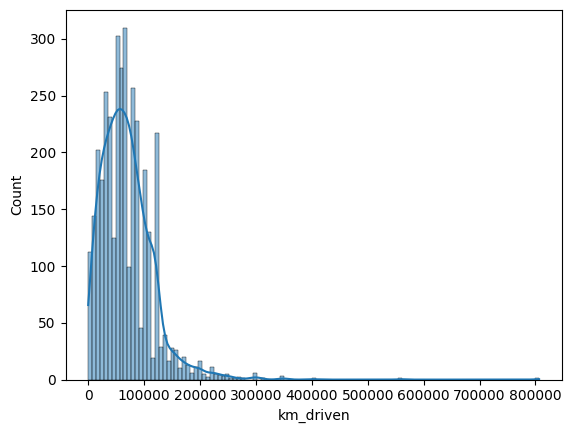

In [11]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_features:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

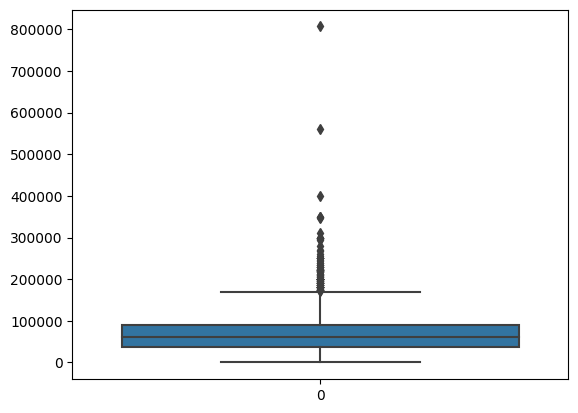

In [12]:
sns.boxplot(df['km_driven'])


<Axes: >

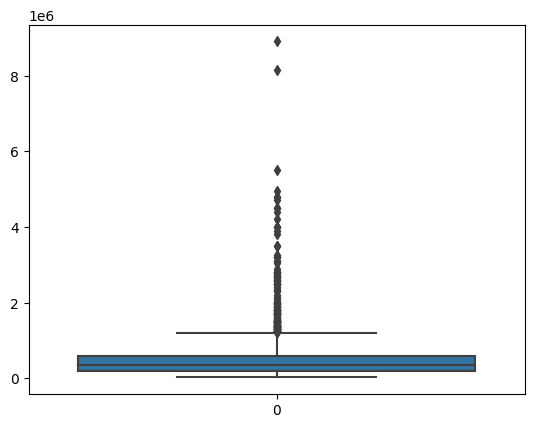

In [13]:
sns.boxplot(df['selling_price'])

<Axes: >

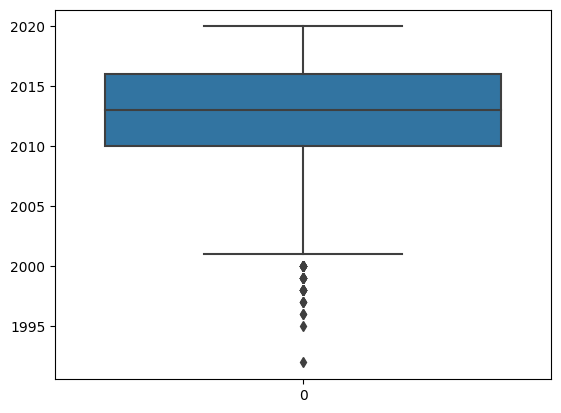

In [14]:
sns.boxplot(df['year'])

/tmp/ipykernel_589/82221999.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_589/82221999.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_589/82221999.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_589/82221999.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


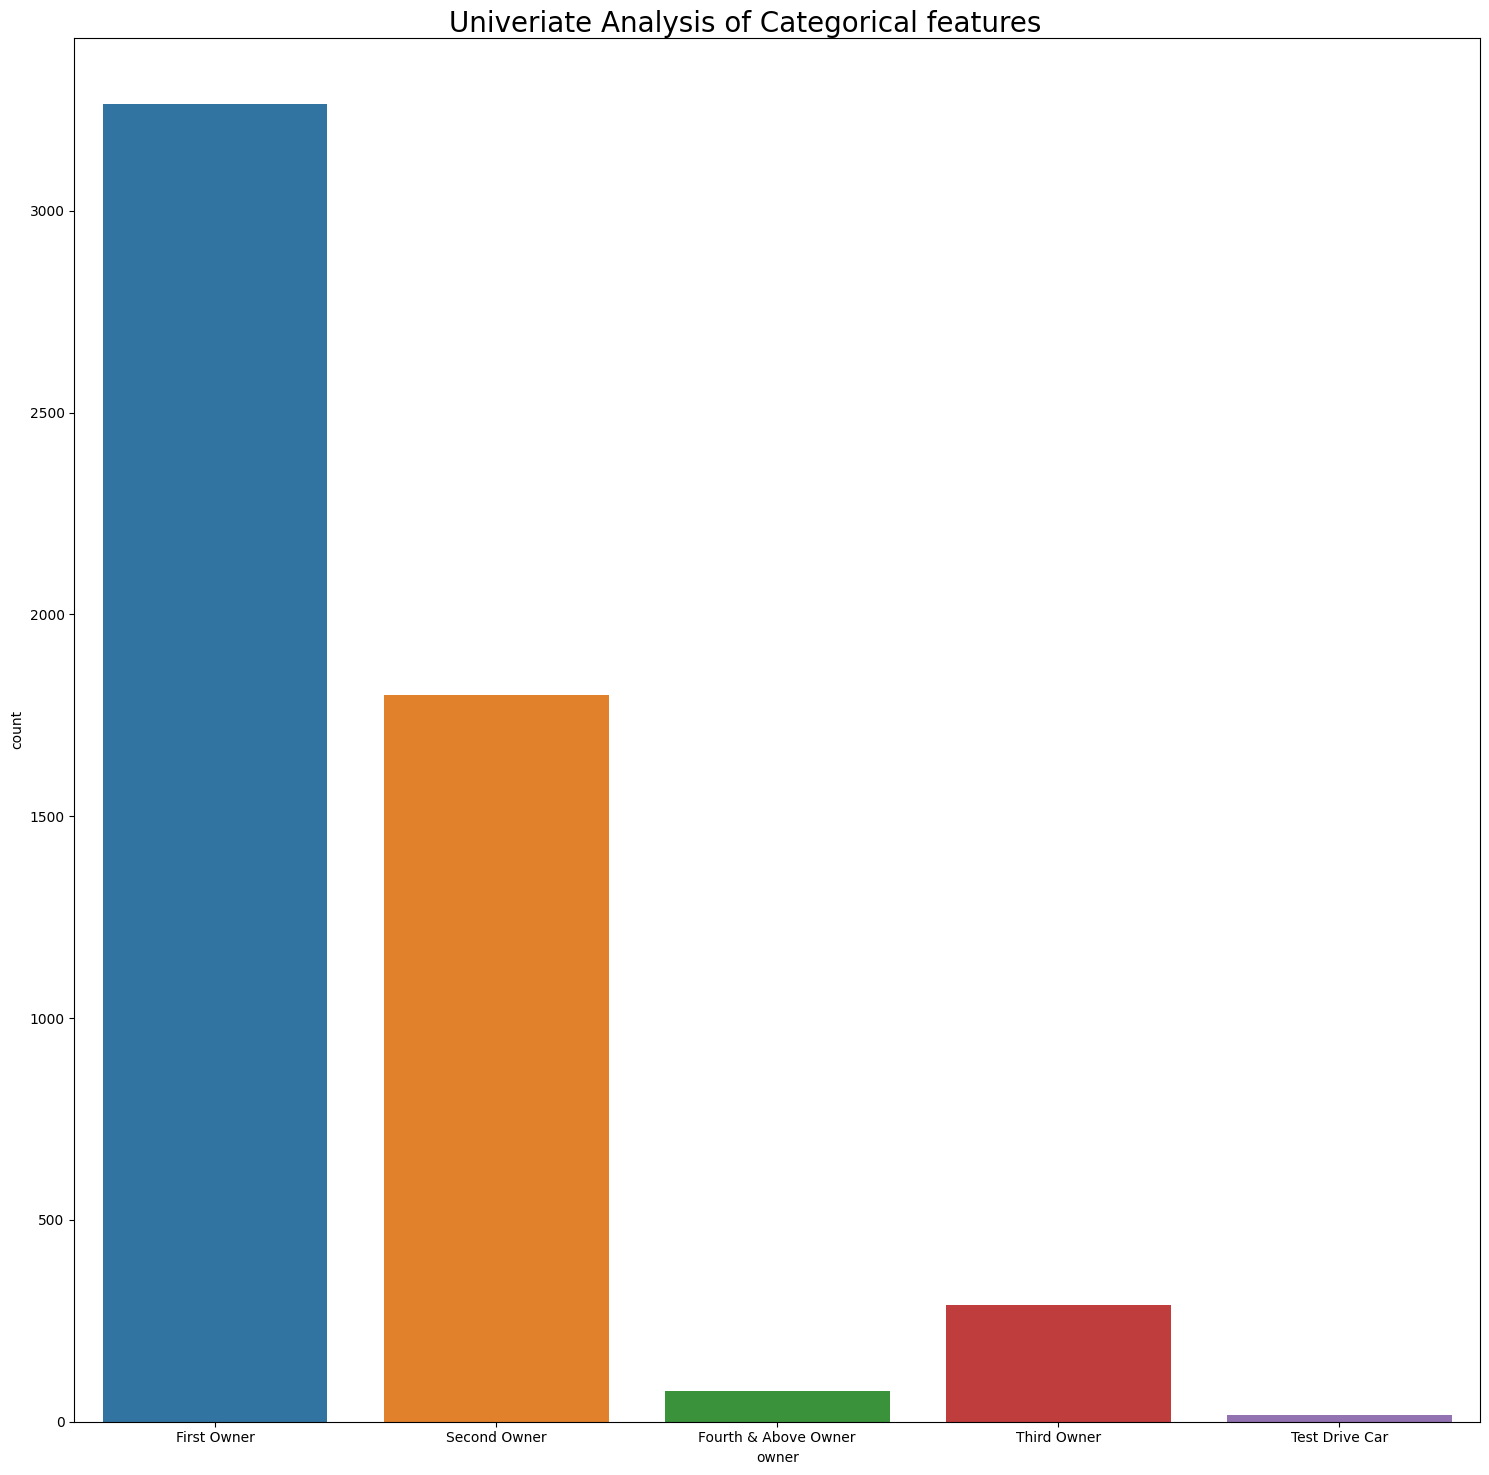

In [16]:
plt.figure(figsize=(15,15))
plt.suptitle('Univeriate Analysis of Categorical features', fontsize=20,fontweight=20)

for i in range (0,len(categorical_features)):
    #plt.subplot(2,2,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

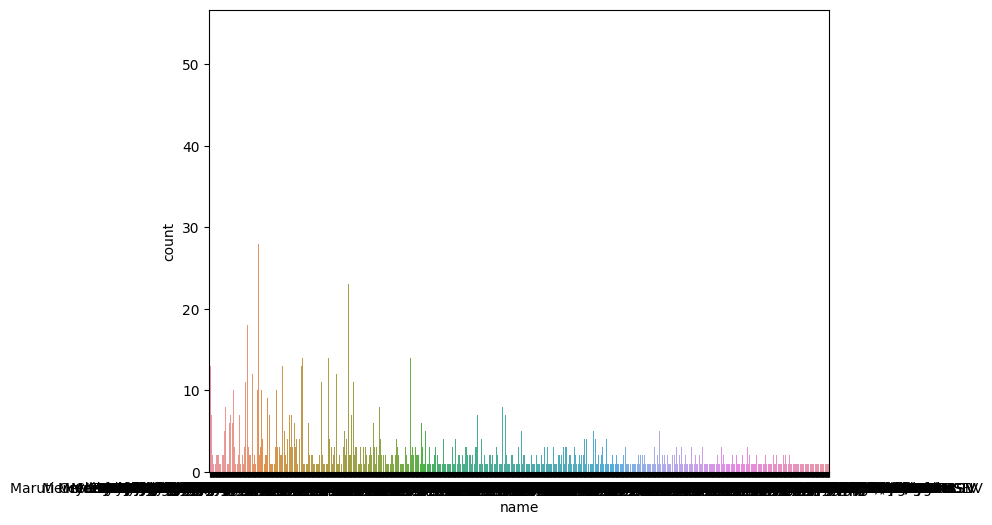

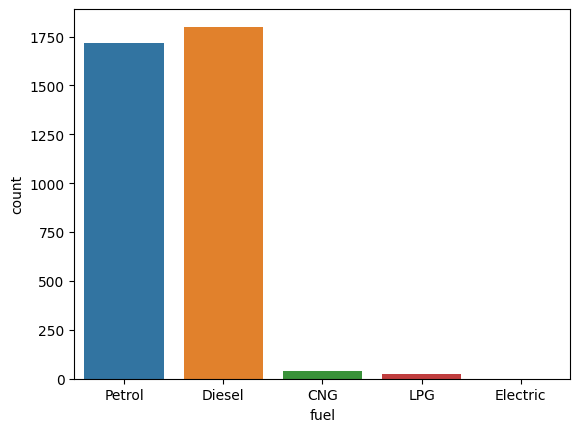

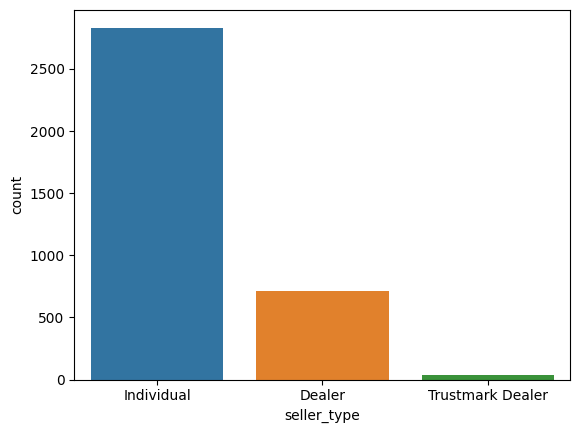

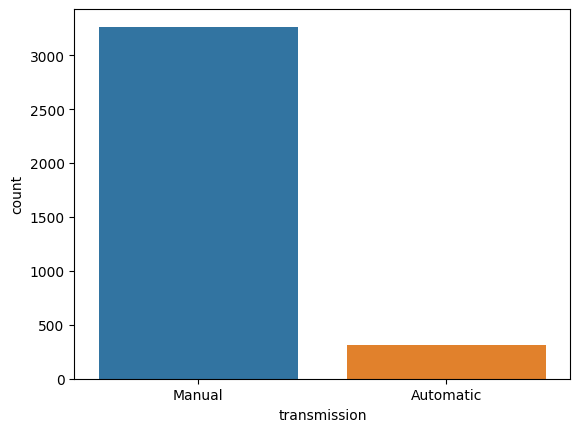

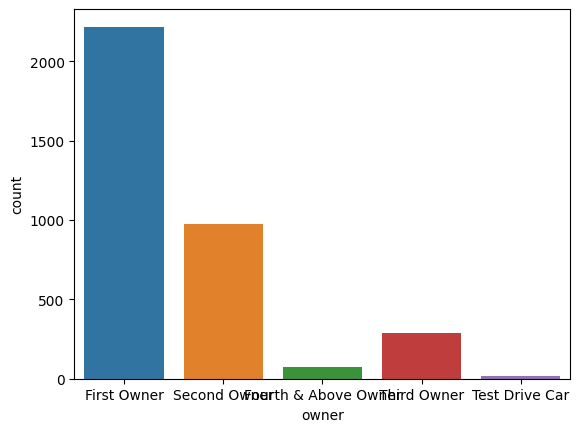

In [18]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_features:
    sns.countplot(data=df,x=i)
    print('\n')
    plt.show()

<Axes: >

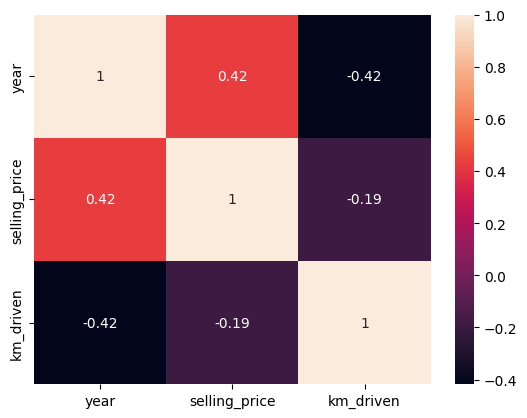

In [19]:
corr=df.select_dtypes(exclude=[object]).corr()
sns.heatmap(corr,annot=True)


In [20]:
categorical_features


['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [21]:
print(f'name : {df["name"].unique()}',end='\n')
print(f'fuel: : {df["fuel"].unique()}',end='\n')
print(f'seller_type: : {df["seller_type"].unique()}',end='\n')
print(f'transmission: : {df["transmission"].unique()}',end='\n')
print(f'owner: : {df["owner"].unique()}',end='\n')

name : ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel: : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type: : ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: : ['Manual' 'Automatic']
owner: : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [22]:
fuel_map={'Petrol':1, 'Diesel':2, 'CNG':3, 'LPG':4, 'Electric':5}
seller_map={'Individual':1, 'Dealer':2, 'Trustmark Dealer':3}
transmission_map={'Manual':1, 'Automatic':2}
owner_map={'First Owner':1, 'Second Owner':2, 'Fourth & Above Owner':4 ,'Third Owner':5 , 'Test Drive Car':0}

In [23]:
df['fuel']=df['fuel'].map(fuel_map)
df['seller_type'] = df['seller_type'].map(seller_map)
df['transmission'] = df['transmission'].map(transmission_map)
df['owner'] = df['owner'].map(owner_map)

In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,1,2


In [25]:
'''
df['name']=df['name'].str.split(' ').str[0]
df['name'].value_counts()
df['name'].unique()
name_map={'Maruti':1, 'Hyundai':2, 'Datsun':3, 'Honda':4, 'Tata':5, 'Chevrolet':6,
       'Toyota':6, 'Jaguar':6, 'Mercedes-Benz':7, 'Audi':8, 'Skoda':9,'Jeep':10,
       'BMW':11, 'Mahindra':12, 'Ford':13,'Nissan':14, 'Renault':15, 'Fiat':16,
       'Volkswagen':17, 'Volvo':18, 'Mitsubishi':19, 'Land':20, 'Daewoo':21, 'MG':22,
       'Force':23, 'Isuzu':24, 'OpelCorsa':25, 'Ambassador':26, 'Kia':27}
df['name']=df['name'].map(name_map)
'''

# TARGET GUIDED ORDINAL ENCODING
'''df ['name'] = df ['name'].astype(str).str[0]
df.groupby(['name'])['selling_price'].mean().sort_values()
labels = df.groupby(['name'])['selling_price'].mean().sort_values().index
enumerate (labels,0)
label_two = {k:i for i,k in enumerate (labels ,0)}
df ['name'] = df['name'].map(label_two)'''

#MEAN ORDINAL ENCODING
mean_ordinal = df.groupby(['name'])['selling_price'].mean().to_dict()
df['name'] = df ['name'].map(mean_ordinal)


In [26]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,99250.000000,2007,60000,70000,1,1,1,1
1,142428.571429,2007,135000,50000,1,1,1,1
2,482692.076923,2012,600000,100000,2,1,1,1
3,221999.800000,2017,250000,46000,1,1,1,1
4,517857.142857,2014,450000,141000,2,1,1,2


In [27]:
corr

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000
